## Importing libraries

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


### Reading the data

In [294]:
df=pd.read_csv("HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)

In [295]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [297]:
df.duplicated().sum()

0

`No Missing values OR Duplicated values`

In [298]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


`we will drop useless columns`
   - EmployeeCount & StandardHours => fixed value for all employees
   - EmployeeNumber => won't be effective
   - Over18 => we already have an AGE column

In [299]:
df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1,inplace=True)

In [300]:
df.shape

(1470, 31)

### let's do some `Visualizations`

In [301]:
cat = df.select_dtypes(include='O')
cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 92.0+ KB


In [302]:
print(cat["Attrition"].nunique())
print(cat["Gender"].nunique())
print(cat["OverTime"].nunique())
print(cat["MaritalStatus"].nunique())
print(cat["BusinessTravel"].nunique())
print(cat["Department"].nunique())
print(cat["EducationField"].nunique())
print(cat["JobRole"].nunique())

2
2
2
3
3
3
6
9


Working in the categorical columns that doesn't contain too much values :
1) Attrition Distribution
2) Gender Distribution
3) OverTime Distribution
4) MaritalStatus Distribution
5) BusinessTravel Distribution
6) Department Distribution

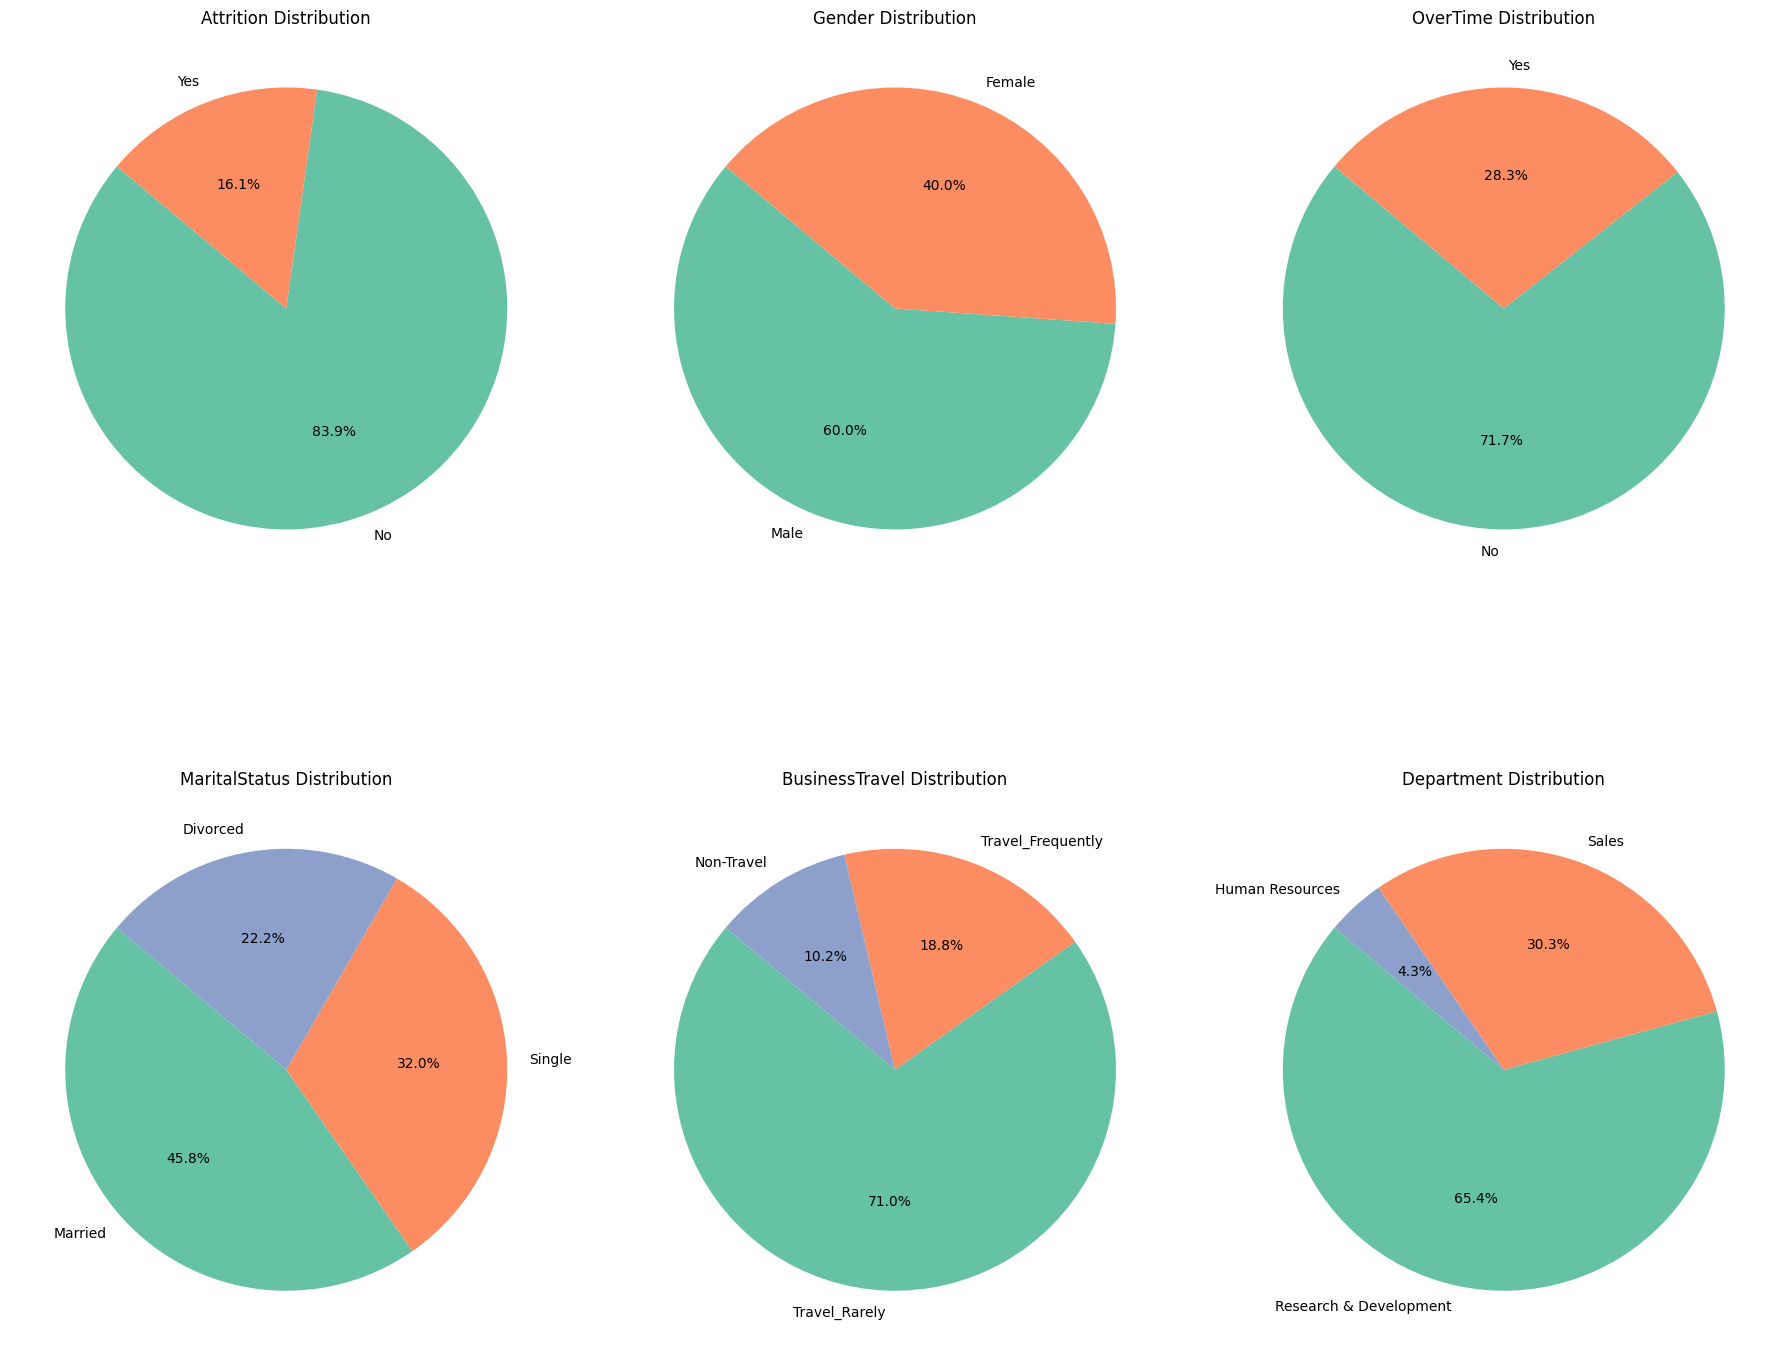

In [303]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 17))
axes = axes.flatten()

for i, col in enumerate(["Attrition",'Gender', 'OverTime', 'MaritalStatus', 'BusinessTravel', 'Department']):
    data = df[col].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%',  colors=plt.cm.Set2.colors, startangle=140)
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


Working in the categorical columns that contain too much values :
1) EducationField Distribution
2) JobRole Distribution

<ipython-input-304-ed2322236ced>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=axes[i])
<ipython-input-304-ed2322236ced>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=axes[i])


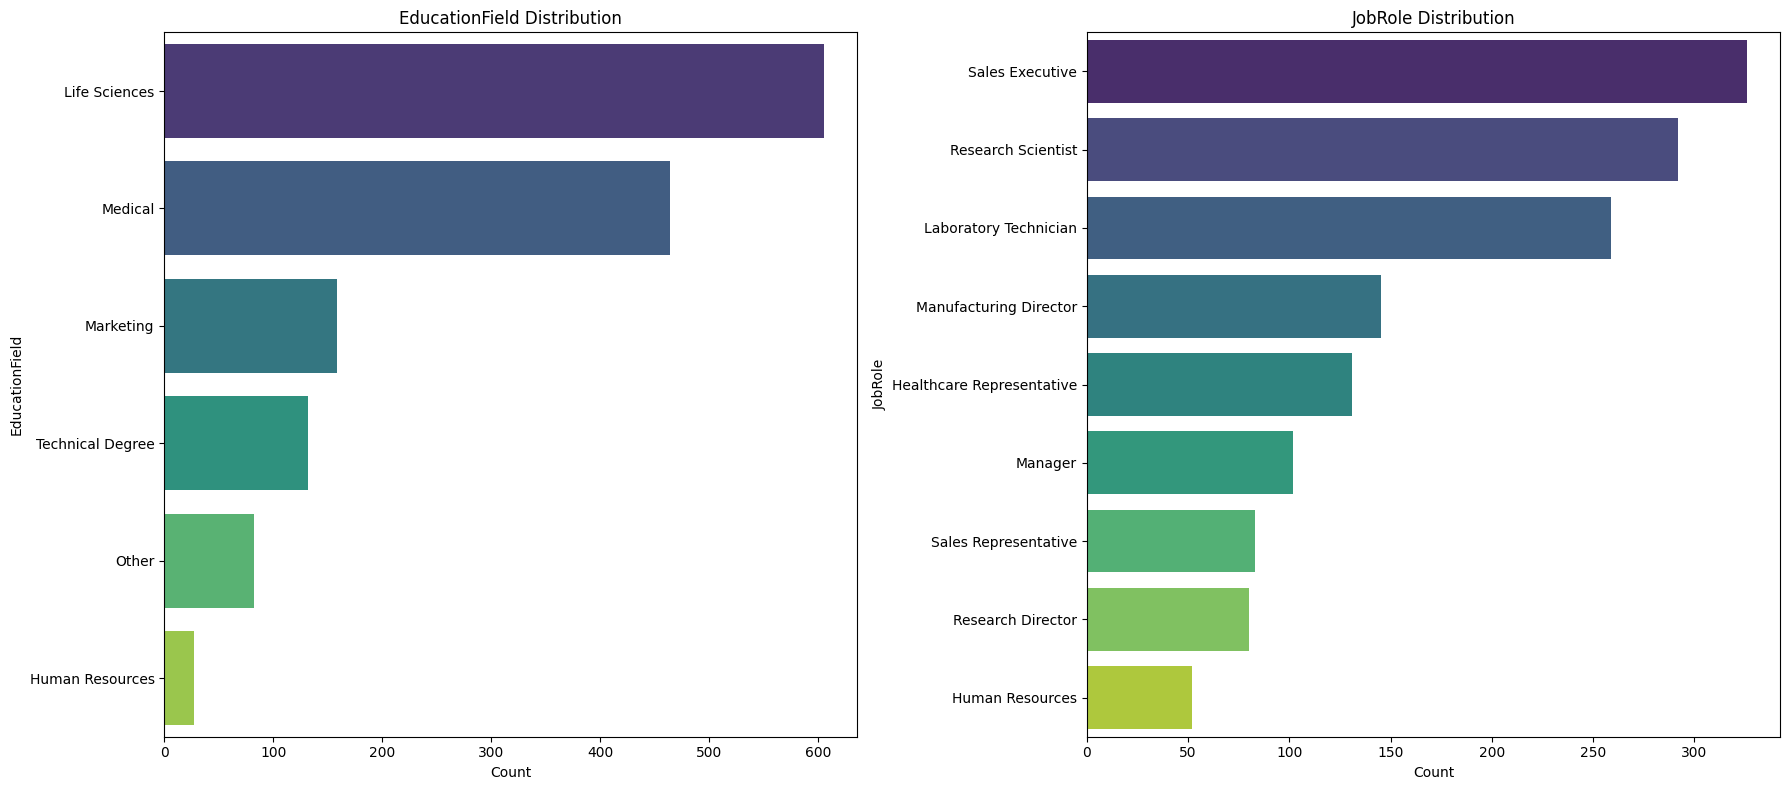

In [304]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
for i, col in enumerate(['EducationField', 'JobRole']):
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Then, we need to show the Attrition distribution over the other categorical variables :
1) Attrition by Department
2) Attrition by Gender
3) Attrition by MaritalStatus
4) Attrition by BusinessTravel
5) Attrition by EducationField
6) Attrition by OverTime
7) Attrition by JobRole

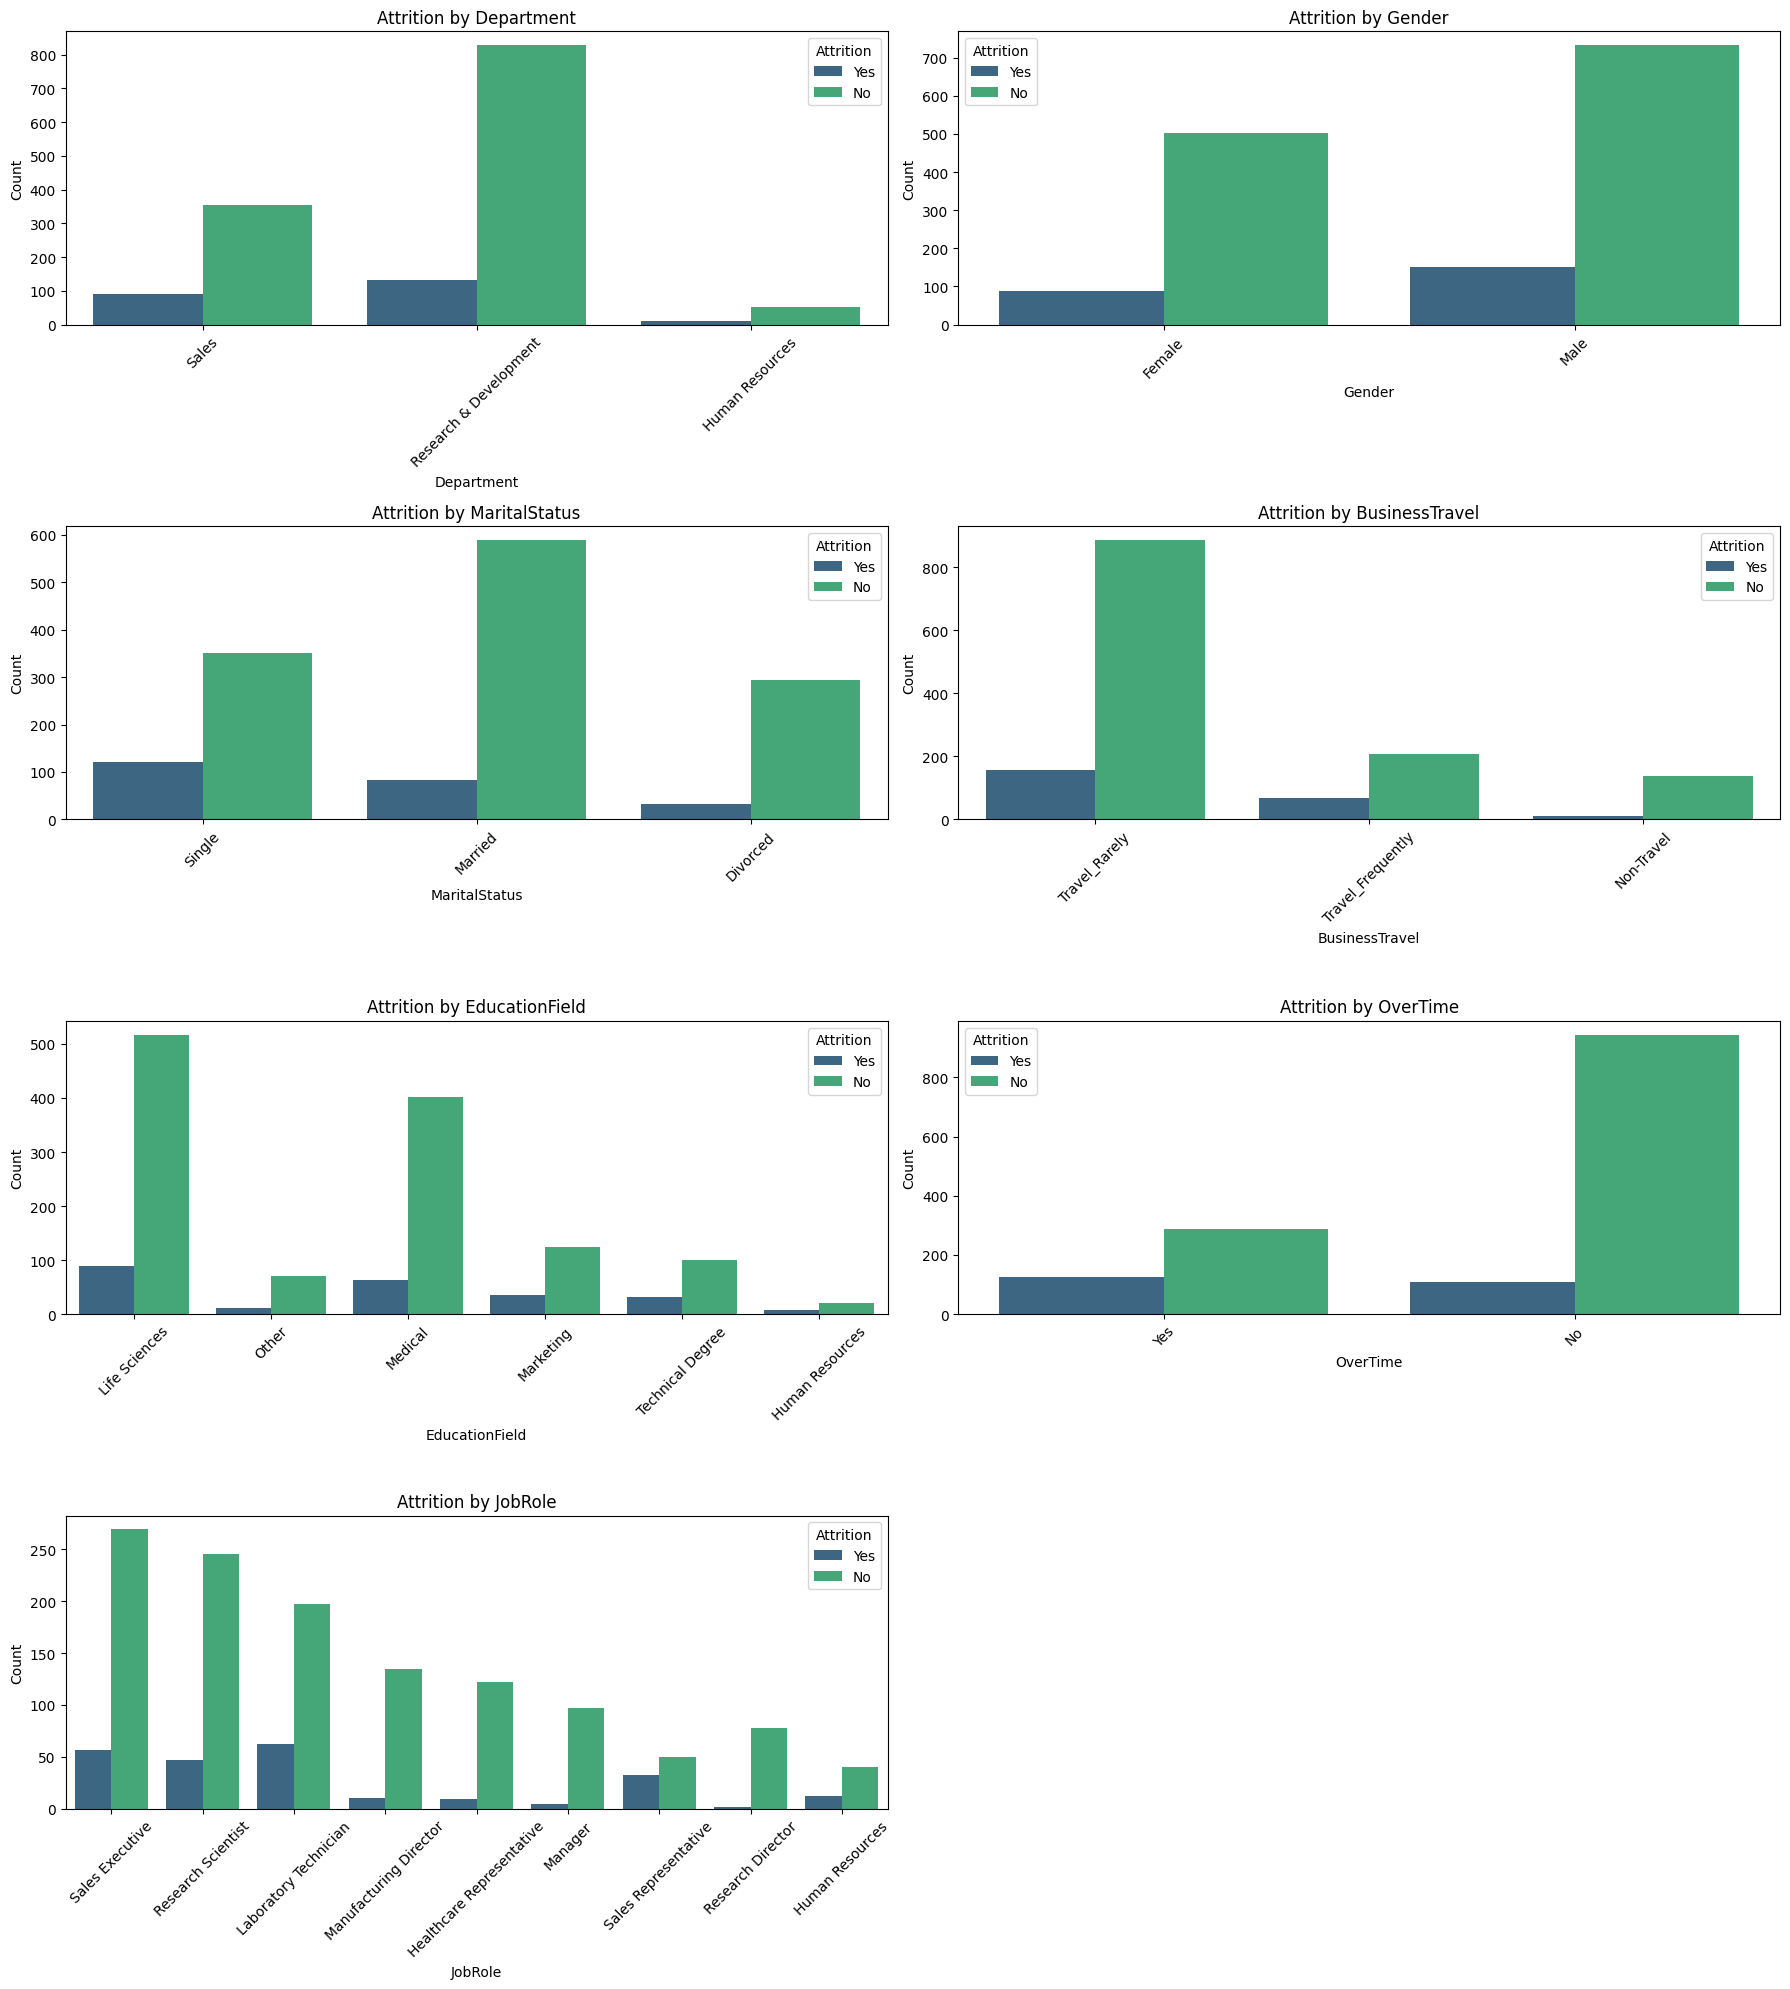

In [305]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()

columns_to_plot = ['Department', 'Gender', 'MaritalStatus', 'BusinessTravel','EducationField', 'OverTime', 'JobRole'] # Define columns_to_plot here

for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, hue='Attrition', data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Let's show some numerical columns distributions :
1) Columns with continuous Values
2) Columns with discrete values

In [306]:
cat = df.select_dtypes(exclude='O')
cat.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Columns with continuous Values distributions:
1) Distribution of Age
2) Distribution of DailyRate
3) Distribution of MonthlyIncome
4) Distribution of MonthlyRate
5) Distribution of DistanceFromHome

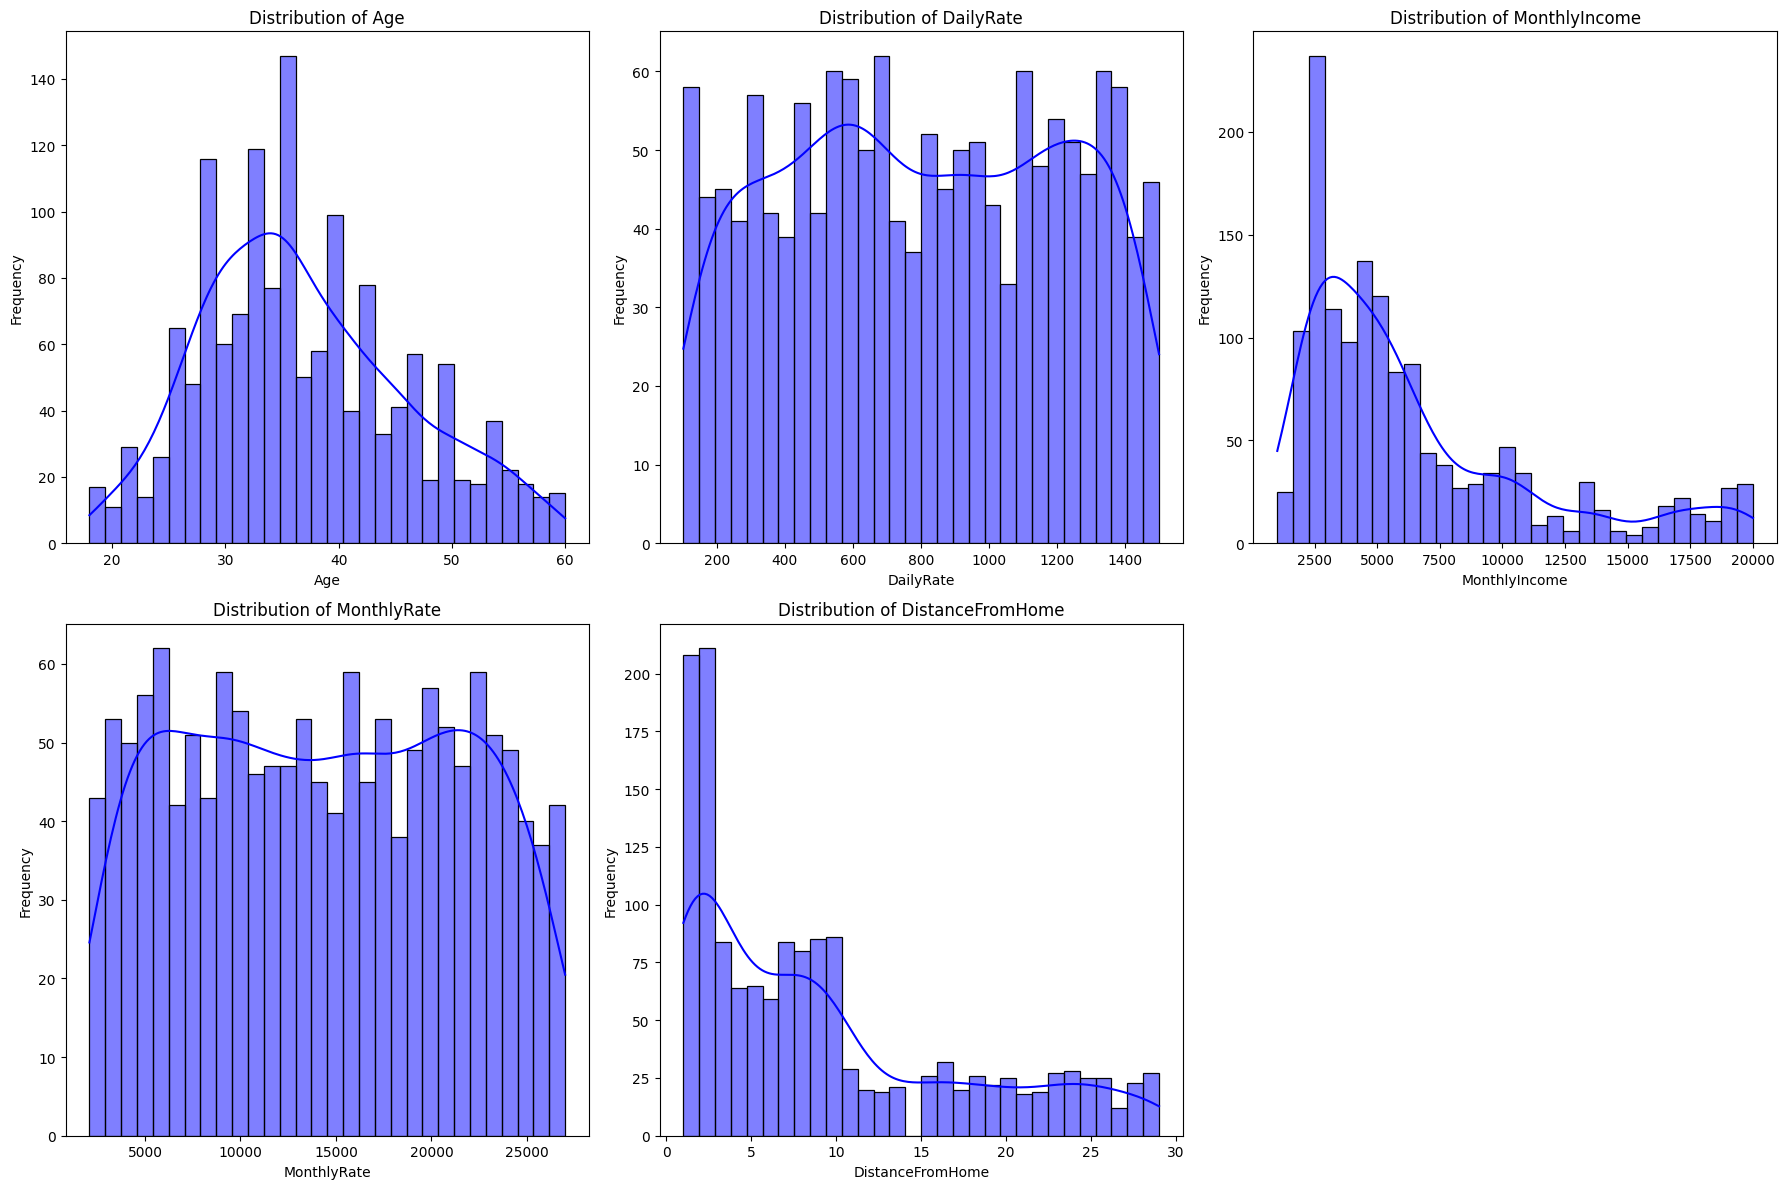

In [307]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
columns_to_plot=['Age', 'DailyRate', 'MonthlyIncome', 'MonthlyRate', 'DistanceFromHome']
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Columns with descrete Values distributions:

1) Distribution of EnvironmentSatisfaction
2) Distribution of JobInvolvement
3) Distribution of JobLevel
4) Distribution of JobSatisfaction
5) Distribution of RelationshipSatisfaction
6) Distribution of StockOptionLevel
7) Distribution of WorkLifeBalance

<ipython-input-308-8ad483319fcf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
<ipython-input-308-8ad483319fcf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
<ipython-input-308-8ad483319fcf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
<ipython-input-308-8ad483319fcf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

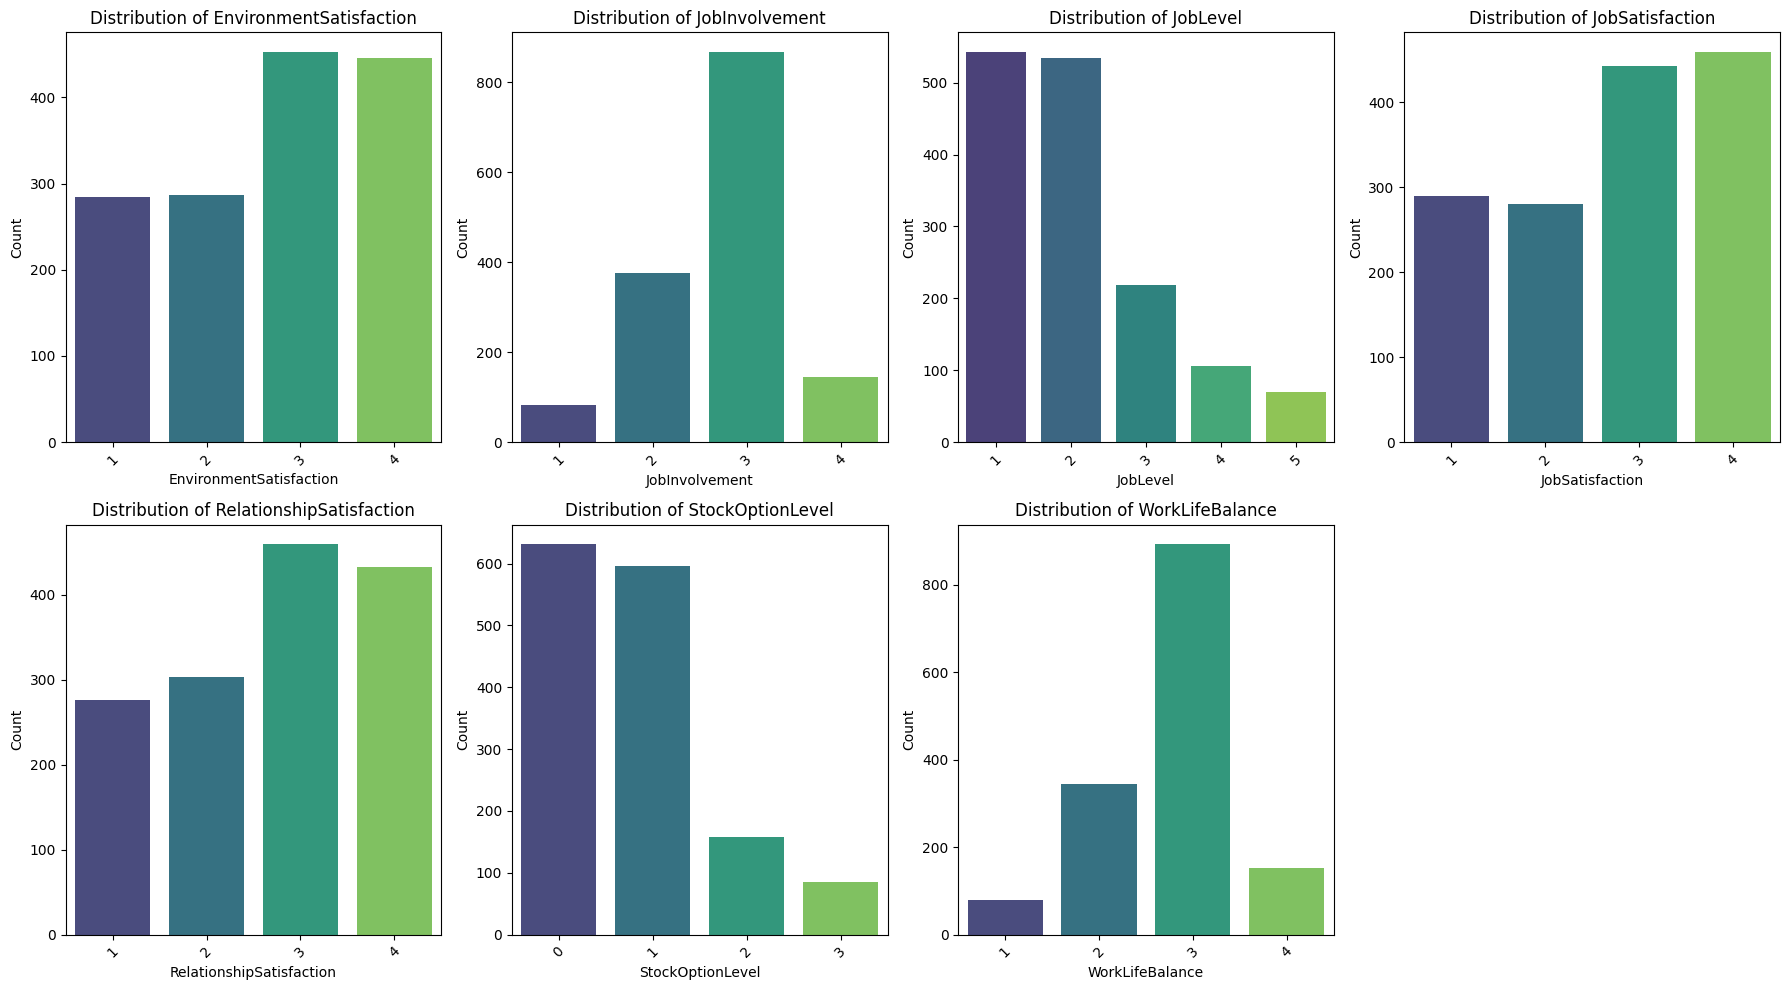

In [308]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

discrete_vars = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                 'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel',
                 'WorkLifeBalance'] # Define discrete_vars here

for i, col in enumerate(discrete_vars):
    sns.countplot(x=col, data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

if len(discrete_vars) < len(axes):
    for j in range(len(discrete_vars), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

now we will use boxplot to plot outliers

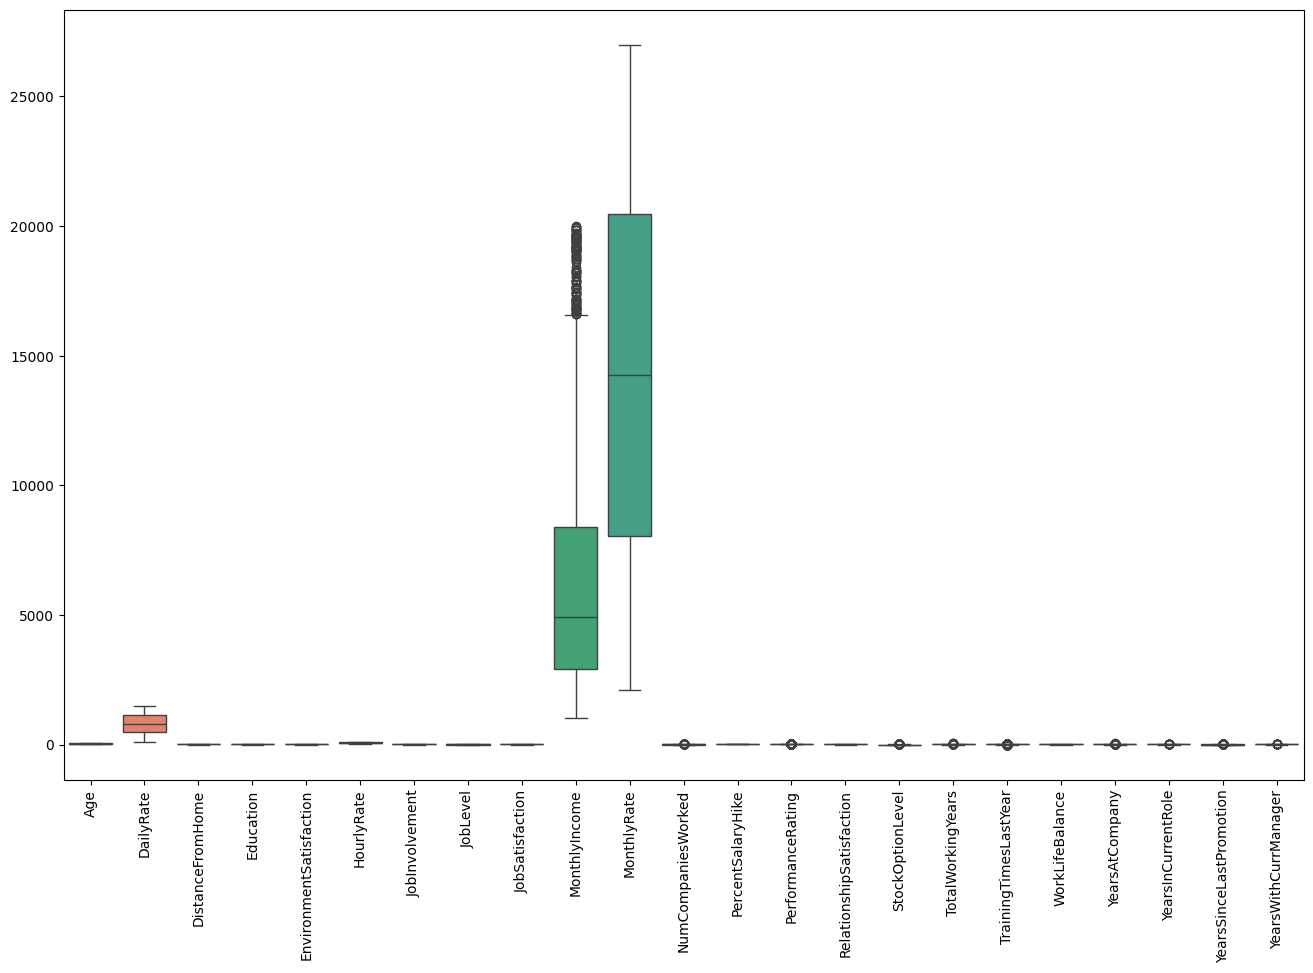

In [309]:
plt.figure(figsize=(16,10))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

<ipython-input-310-111f47182fe2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='MonthlyIncome', data=df, palette='viridis', ax=axes[i])


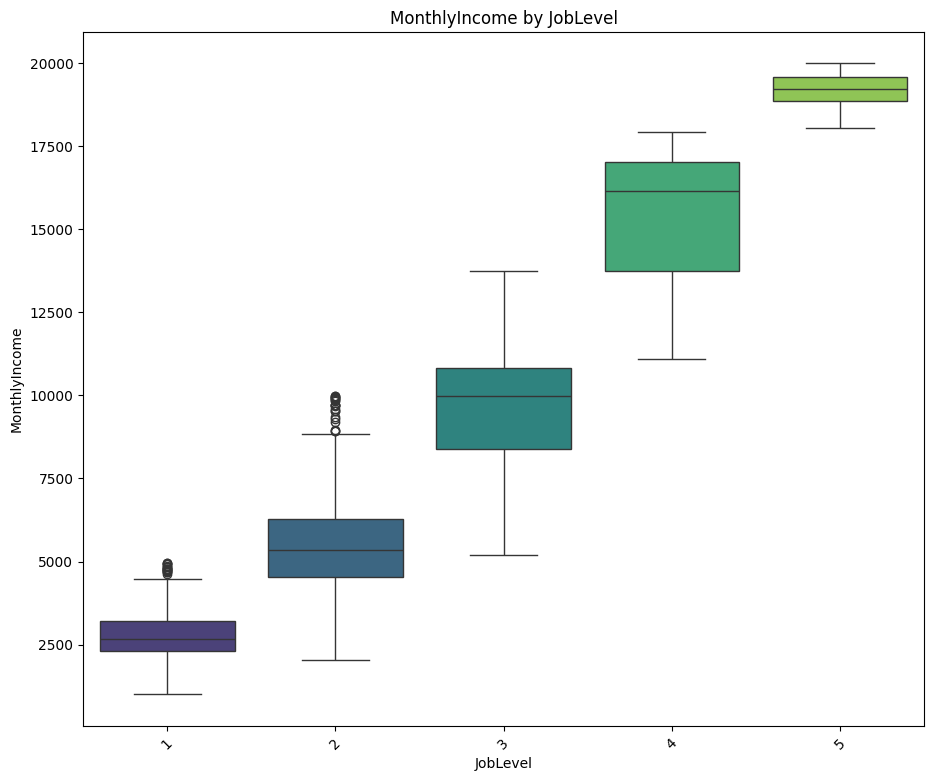

In [310]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))
axes = axes.flatten()

columns_to_plot = ["JobLevel"]

for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=col, y='MonthlyIncome', data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'MonthlyIncome by {col}')
    axes[i].set_ylabel('MonthlyIncome')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Removing unused subplots
if len(columns_to_plot) < len(axes):
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


encoding the categorical columns values into numerical

In [311]:
for i in ["Gender","Department","JobRole","MaritalStatus","OverTime","EducationField", "BusinessTravel", "Attrition"]:
    print(f"{i} : {df[i].unique()}")


Gender : ['Female' 'Male']
Department : ['Sales' 'Research & Development' 'Human Resources']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Attrition : ['Yes' 'No']


In [312]:
encoder = LabelEncoder()
for i in ["Gender", "BusinessTravel","Attrition"]:
    df[i] = encoder.fit_transform(df[i])

In [313]:
#encoding for nominal data
df = pd.get_dummies(df, columns=["Department","JobRole","MaritalStatus","OverTime","EducationField"], drop_first=True)

In [314]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,2,1102,1,2,2,0,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,False,False,False,False,True,False,False,True,True,True,False,False,False,False
1,49,0,1,279,8,1,3,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
2,37,1,2,1373,2,2,4,1,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False
3,33,0,1,1392,3,4,4,0,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False
4,27,0,2,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   BusinessTravel                     1470 non-null   int64
 3   DailyRate                          1470 non-null   int64
 4   DistanceFromHome                   1470 non-null   int64
 5   Education                          1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   Gender                             1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [316]:
target=df['Attrition']
df.drop('Attrition',axis=1,inplace=True)
df=pd.concat([df,target],axis=1)
df.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition
0,41,2,1102,1,2,2,0,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,False,False,False,False,True,False,False,True,True,True,False,False,False,False,1
1,49,1,279,8,1,3,1,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,0
2,37,2,1373,2,2,4,1,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,1
3,33,1,1392,3,4,4,0,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False,False,False,0
4,27,2,591,2,1,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,0


In [317]:
df["Attrition"].value_counts()

,count
Attrition,
0,1233
1,237


Attrition = 1: The employee has left the organization.


Attrition = 0: The employee is still employed.



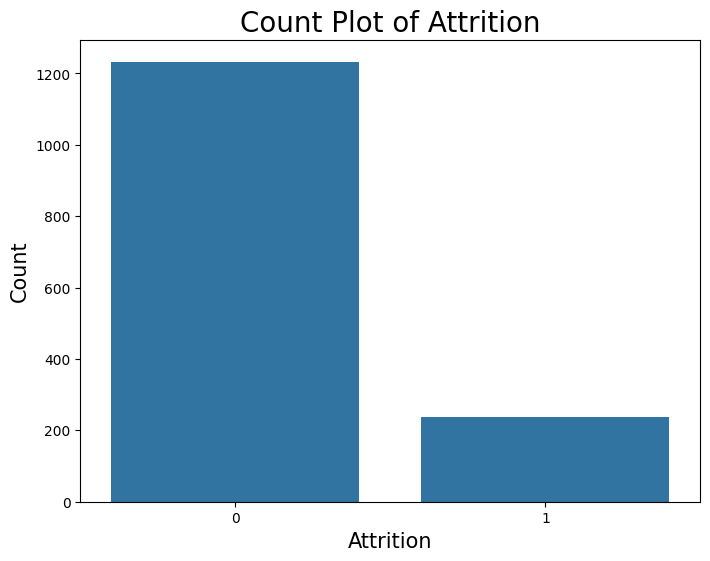

In [318]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Count Plot of Attrition', fontsize=20)
plt.xlabel('Attrition', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

the target variable is imbalanced , so using accuracy for evaluation won't be effective


so we will use another evaluation metricses like(recall , f1 score)

Working on the correlation:

<Axes: >

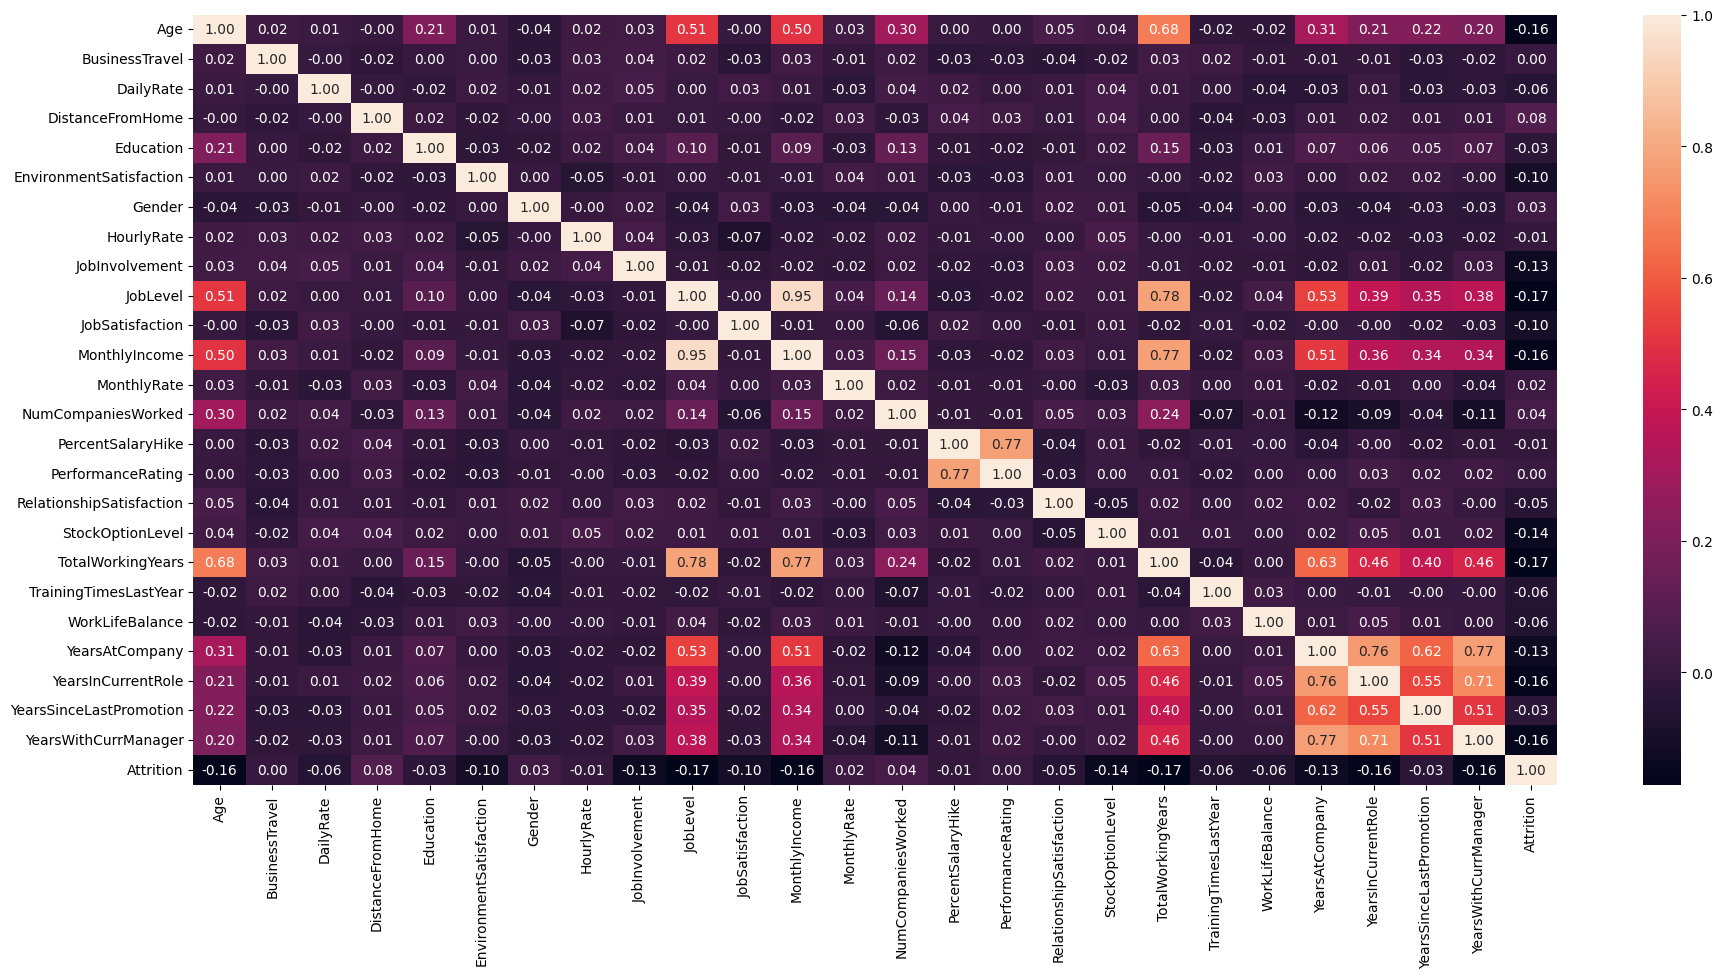

In [319]:
correlation= df.select_dtypes(np.number).corr()
plt.figure(figsize=(22,10))
sns.heatmap(correlation, annot=True, fmt='.2f')

**Splitting** the data into features (x_train,y_train) to train the model on , and target (x_test,y_test) to test the model

In [320]:
y = df['Attrition']
X = df.drop('Attrition', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25,stratify=y)

scaling the data

In [321]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train)
norm_x_train=sc.transform(X_train)
norm_x_test=sc.transform(X_test)

### `Machine lerning models`

`Logistic regression model `

In [322]:
lr = LogisticRegression(solver='liblinear',max_iter=10000)
lr.fit(X_train,np.ravel(y_train))

LogisticRegression(max_iter=10000, solver='liblinear')

In [323]:
from sklearn.metrics import classification_report

lr_pred = lr.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, lr_pred))

print("Classification Report:\n", classification_report(y_test, lr_pred))
cm_lr=confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:\n",cm_lr )

f1_lr = f1_score(y_test, lr_pred,average='weighted')
print("Overall F1-Score:", f1_lr)

Test Accuracy: 0.873015873015873
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.78      0.30      0.43        71

    accuracy                           0.87       441
   macro avg       0.83      0.64      0.68       441
weighted avg       0.86      0.87      0.85       441

Confusion Matrix:
 [[364   6]
 [ 50  21]]
Overall F1-Score: 0.8480725623582767


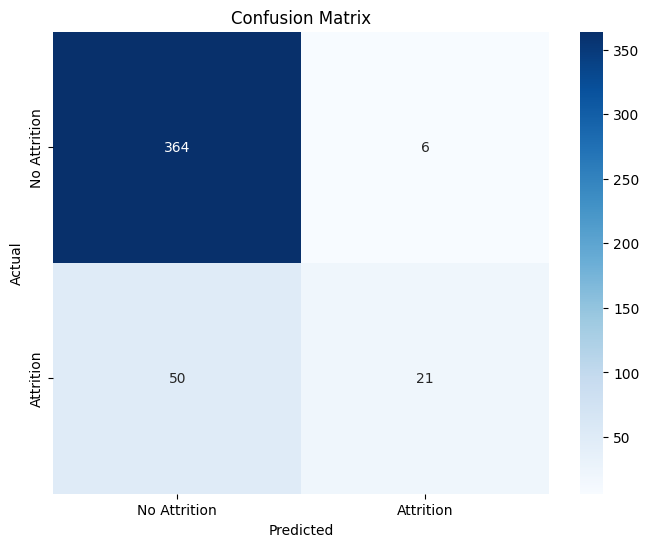

In [324]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`Decesion Tree`

In [325]:
tree = DecisionTreeClassifier(max_depth=5,min_samples_split=50)
tree.fit(norm_x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=50)

In [326]:
tree_pred = tree.predict(norm_x_test)

print("Test Accuracy:", accuracy_score(y_test, tree_pred))

print("Classification Report:\n", classification_report(y_test, tree_pred))
cm_tree=confusion_matrix(y_test, tree_pred)
print("Confusion Matrix:\n",cm_tree)
f1_tree = f1_score(y_test, tree_pred,average='weighted')
print("Overall F1-Score:", f1_tree)

Test Accuracy: 0.8390022675736961
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       370
           1       0.50      0.28      0.36        71

    accuracy                           0.84       441
   macro avg       0.69      0.61      0.63       441
weighted avg       0.81      0.84      0.82       441

Confusion Matrix:
 [[350  20]
 [ 51  20]]
Overall F1-Score: 0.8197572622253


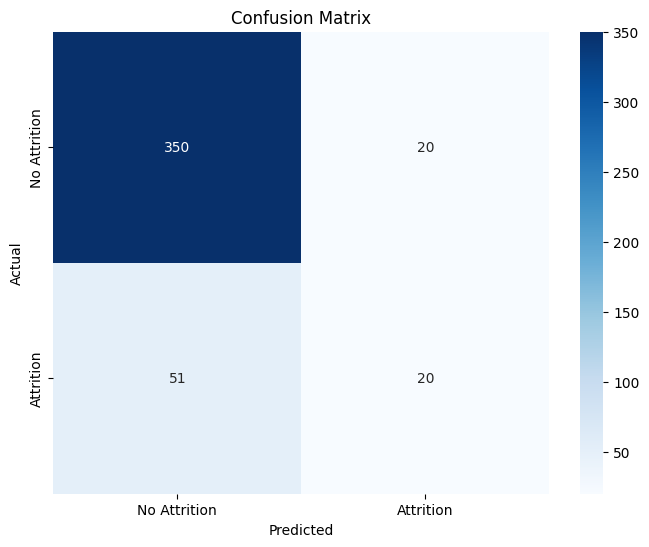

In [327]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`SVM`

In [328]:
svm = SVC(C=0.3,kernel="linear")
svm.fit(norm_x_train,np.ravel(y_train))

SVC(C=0.3, kernel='linear')

In [329]:
svm_pred = svm.predict(norm_x_test)

print("Test Accuracy:", accuracy_score(y_test, svm_pred))

print("Classification Report:\n", classification_report(y_test, svm_pred))

cm_svm=confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:\n",cm_svm)

f1_svm = f1_score(y_test, svm_pred,average='weighted')
print("Overall F1-Score:", f1_svm)

Test Accuracy: 0.8798185941043084
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.70      0.44      0.54        71

    accuracy                           0.88       441
   macro avg       0.80      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441

Confusion Matrix:
 [[357  13]
 [ 40  31]]
Overall F1-Score: 0.8678256602038051


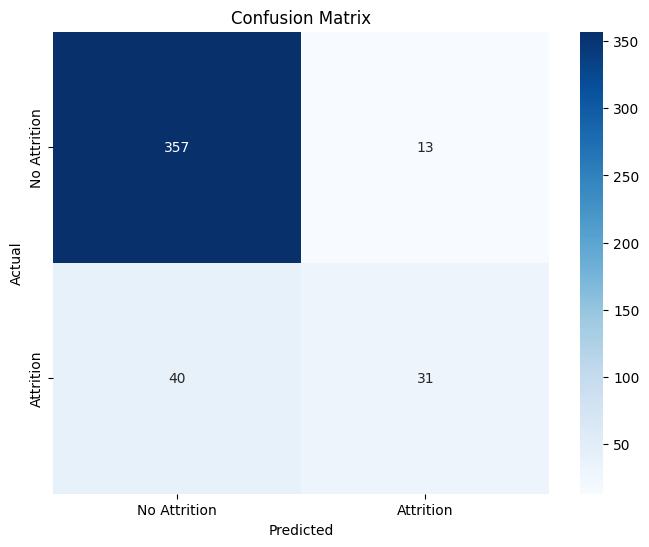

In [330]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

`voting classifier`




In [331]:
from sklearn.ensemble import VotingClassifier

vmodel=VotingClassifier(estimators=[('lr',lr),('svm',svm),('tree',tree)])

vmodel.fit(norm_x_train,y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 solver='liblinear')),
                             ('svm', SVC(C=0.3, kernel='linear')),
                             ('tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=50))])

In [332]:
v_pred=vmodel.predict(norm_x_test)


print("Test Accuracy:", accuracy_score(y_test, v_pred))

print("Classification Report:\n", classification_report(y_test, v_pred))
cm_v=confusion_matrix(y_test, v_pred)
print("Confusion Matrix:\n",cm_v)

f1_v = f1_score(y_test, v_pred,average='weighted')
print("Overall F1-Score:", f1_v)


Test Accuracy: 0.8843537414965986
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.72      0.46      0.56        71

    accuracy                           0.88       441
   macro avg       0.81      0.71      0.75       441
weighted avg       0.87      0.88      0.87       441

Confusion Matrix:
 [[357  13]
 [ 38  33]]
Overall F1-Score: 0.8738880167451596


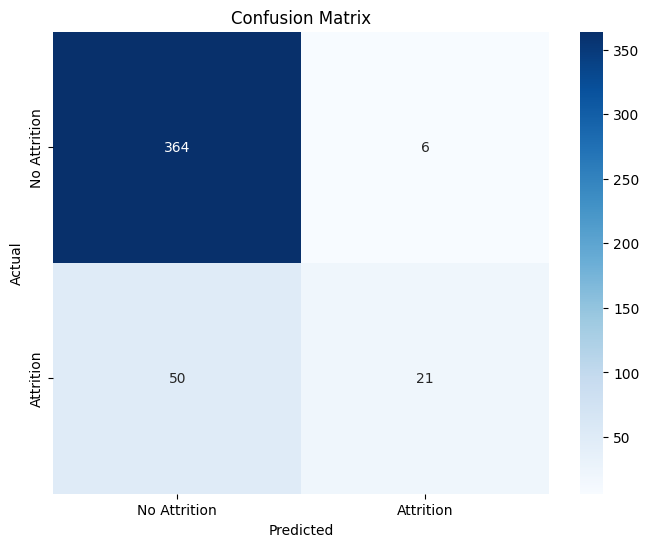

In [333]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [334]:
model_f1_scores = {
    'Logistic Regression': f1_lr,
    'Decision Tree': f1_tree,
    'SVM': f1_svm,
    'Voting Classifier': f1_v
}

f1_df = pd.DataFrame(list(model_f1_scores.items()), columns=['Model', 'F1-Score'])

f1_df = f1_df.sort_values(by='F1-Score', ascending=False)

print(f1_df)


                 Model  F1-Score
3    Voting Classifier  0.873888
2                  SVM  0.867826
0  Logistic Regression  0.848073
1        Decision Tree  0.819757


`the best classifier is the voting classifier`

<ipython-input-335-fae21e65f301>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=f1_df, palette='Blues_d')


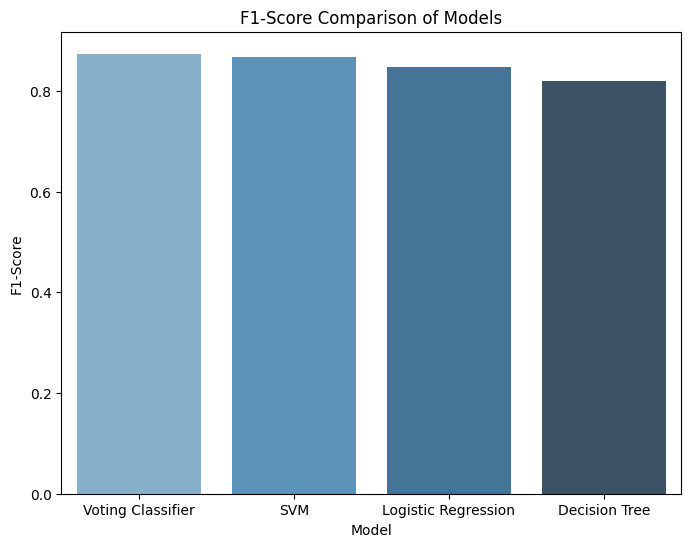

In [335]:

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1-Score', data=f1_df, palette='Blues_d')
plt.title('F1-Score Comparison of Models')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.show()
